Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest ROC-AUC: 0.835905751898577


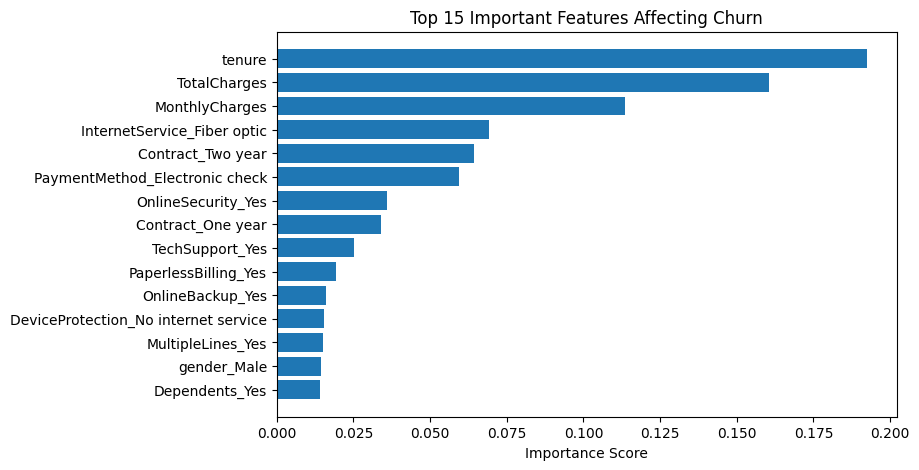

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/Admin/Desktop/Customer-Churn-Prediction/data/raw/churn.csv")

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna()
df = df.drop("customerID", axis=1)

X = df.drop("Churn", axis=1)
y = df["Churn"].map({"Yes": 1, "No": 0})

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    scoring="roc_auc",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_prob_best = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob_best)

print("Optimized Random Forest ROC-AUC:", roc_auc)

importances = best_model.feature_importances_
feature_names = X.columns

feature_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

top_features = feature_df.head(15)

plt.figure(figsize=(8,5))
plt.barh(top_features["Feature"], top_features["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 15 Important Features Affecting Churn")
plt.xlabel("Importance Score")
plt.show()
